# Timeseries Analysis of Appliance and Light Usage

## Frame the problem and look at the big picture

Please see the report on this project in the [repository](https://github.com/parksjr5/Energy_Forecasting).

## Get the data

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

/Users/jessicaparks/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/jessicaparks/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [31]:
# import data
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')
df.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [3]:
# data dimensions
df.shape

(19735, 29)

In [ ]:
# data info
df.info()

#### Create train and test data

In [27]:
df_train, df_test = df[0:-int(.8*df.shape[0])], df[-int(.8*df.shape[0]):]
print(df_train.shape)
print(df_test.shape)

(3947, 29)
(15788, 29)


In [33]:
# create exploratory data
exp_df = df_train

## Explore the data

#### Attribute and Characteristics

In [ ]:
# column names
exp_df.columns

In [ ]:
# check for missing values
exp_df.isna().sum()

In [34]:
# check data types of each column
exp_df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

#### Visualize Data

In [ ]:
fig, ax = plt.subplots(4,5, figsize=(16,9))

ax[0,0].plot(exp_df['date'].loc[:100,], exp_df['T1'].loc[:100,])
ax[0,0].tick_params(labelbottom = False, bottom = False)
ax[0,0].set_ylabel('Temperature')
ax[1,0].plot(exp_df['date'].loc[:100,], exp_df['RH_1'].loc[:100,])
ax[1,0].tick_params(labelbottom = False, bottom = False)
ax[1,0].set_ylabel('Humidity')
ax[0,0].set_title('Kitchen Area')

ax[0,1].plot(exp_df['date'].loc[:100,], exp_df['T2'].loc[:100,])
ax[0,1].tick_params(labelbottom = False, bottom = False)
ax[1,1].plot(exp_df['date'].loc[:100,], exp_df['RH_2'].loc[:100,])
ax[1,1].tick_params(labelbottom = False, bottom = False)
ax[0,1].set_title('Living Area')

ax[0,2].plot(exp_df['date'].loc[:100,], exp_df['T3'].loc[:100,])
ax[0,2].tick_params(labelbottom = False, bottom = False)
ax[1,2].plot(exp_df['date'].loc[:100,], exp_df['RH_3'].loc[:100,])
ax[1,2].tick_params(labelbottom = False, bottom = False)
ax[0,2].set_title('Laundry Area')

ax[0,3].plot(exp_df['date'].loc[:100,], exp_df['T4'].loc[:100,])
ax[0,3].tick_params(labelbottom = False, bottom = False)
ax[1,3].plot(exp_df['date'].loc[:100,], exp_df['RH_4'].loc[:100,])
ax[1,3].tick_params(labelbottom = False, bottom = False)
ax[0,3].set_title('Office Area')

ax[0,4].plot(exp_df['date'].loc[:100,], exp_df['T5'].loc[:100,])
ax[0,4].tick_params(labelbottom = False, bottom = False)
ax[1,4].plot(exp_df['date'].loc[:100,], exp_df['RH_5'].loc[:100,])
ax[1,4].tick_params(labelbottom = False, bottom = False)
ax[0,4].set_title('Bathroom')

ax[2,0].plot(exp_df['date'].loc[:100,], exp_df['Appliances'].loc[:100,])
ax[2,0].tick_params(labelbottom = False, bottom = False)
ax[2,0].set_ylabel('Energy (Wh)')
ax[2,0].set_title('Appliances')
ax[3,0].plot(exp_df['date'].loc[:100,], exp_df['lights'].loc[:100,])
ax[3,0].tick_params(labelbottom = False, bottom = False)
ax[3,0].set_ylabel('Energy (Wh)')
ax[3,0].set_title('Lights')
ax[3,0].set_xlabel('Time (mins)')

ax[2,1].plot(exp_df['date'].loc[:100,], exp_df['T8'].loc[:100,])
ax[2,1].tick_params(labelbottom = False, bottom = False)
ax[2,1].set_ylabel('Temperature')
ax[3,1].plot(exp_df['date'].loc[:100,], exp_df['RH_8'].loc[:100,])
ax[3,1].set_xlabel('Time (mins)')
ax[3,1].set_ylabel('Humidity')
ax[3,1].tick_params(labelbottom = False, bottom = False)
ax[2,1].set_title('Teenager Room')

ax[2,2].plot(exp_df['date'].loc[:100,], exp_df['T3'].loc[:100,])
ax[2,2].tick_params(labelbottom = False, bottom = False)
ax[3,2].plot(exp_df['date'].loc[:100,], exp_df['RH_3'].loc[:100,])
ax[3,2].tick_params(labelbottom = False, bottom = False)
ax[3,2].set_xlabel('Time (mins)')
ax[2,2].set_title('Parents Room')

ax[2,3].plot(exp_df['date'].loc[:100,], exp_df['T6'].loc[:100,])
ax[2,3].tick_params(labelbottom = False, bottom = False)
ax[3,3].plot(exp_df['date'].loc[:100,], exp_df['RH_6'].loc[:100,])
ax[3,3].tick_params(labelbottom = False, bottom = False)
ax[3,3].set_xlabel('Time (mins)')
ax[2,3].set_title('Outside Building')

ax[2,4].plot(exp_df['date'].loc[:100,], exp_df['T7'].loc[:100,])
ax[2,4].tick_params(labelbottom = False, bottom = False)
ax[3,4].plot(exp_df['date'].loc[:100,], exp_df['RH_7'].loc[:100,])
ax[3,4].tick_params(labelbottom = False, bottom = False)
ax[3,4].set_xlabel('Time (mins)')
ax[2,4].set_title('Ironing Room')


plt.tight_layout()

#### Check for Correlations Between Attributes

In [ ]:
#looking at Temperature columns
# regex = '^T' means starts with T
filt = exp_df.filter(regex='^T', axis='columns').corr()
ax = plt.axes()
sns.heatmap(filt.corr(), ax = ax)
ax.set_title('Room Temperature Correlation')
plt.show()

In [ ]:
#looking at Relative Humidity columns
# regex = '^R' means starts with R
filt = exp_df.filter(regex='^R', axis='columns').corr()
ax = plt.axes()
sns.heatmap(filt.corr(), ax = ax)
ax.set_title('Room Relative Humidity Correlation')
plt.show()

#### Check for Potential Transformation Needs

In [ ]:
# rolling mean based on last 5 values
exp_df['rolling_mean_app'] = exp_df['Appliances'].rolling(5).mean()
exp_df['rolling_mean_lights'] = exp_df['lights'].rolling(5).mean()

In [ ]:
fig, ax = plt.subplots(4,1, figsize=(16,9))

ax[0].plot(exp_df['date'], exp_df['rolling_mean_app'])
ax[0].set_title('Appliance Rolling Mean')
ax[0].set_ylabel('Energy (Wh)')
ax[0].tick_params(labelbottom = False, bottom = False)

ax[1].plot(exp_df['date'], exp_df['Appliances'].rolling(5).std())
ax[1].set_title('Appliance Rolling St. Dev')
ax[1].set_ylabel('Energy (Wh)')
ax[1].tick_params(labelbottom = False, bottom = False)

ax[2].plot(exp_df['date'], exp_df['rolling_mean_lights'])
ax[2].set_title('Lights Rolling Mean')
ax[2].set_ylabel('Energy (Wh)')
ax[2].tick_params(labelbottom = False, bottom = False)

ax[3].plot(exp_df['date'], exp_df['lights'].rolling(5).std())
ax[3].set_title('Lights Rolling St. Dev')
ax[3].set_ylabel('Energy (Wh)')
ax[3].tick_params(labelbottom = False, bottom = False)

#### Document what you have learned

There are many basic points of interest and relationships we are able to see just from our exploratory data analysis. For example, there are no missing data points.If we did have missing data though, we would have been able to reasonably use the value of the point before; this is because the data was taken every ten minutes and the temperature and humidity do not significantly change in that time. When we look at the line graphs we can see the trends of energy usage by appliances and lights in the bottom left hand column. In the right above their graphs, we can see the temperature and relative humidity of the kitchen (chosen since many appliances are in this one room). Based on the graphs of all the rooms, we can see there is an overall spike and decline. Look more closely though, and we see these spikes and declines are not all the same. Interestingly, the graphs of the appliances and lights have a greater amount of spikes and variations then most rooms.<br/><br/>
Upon first glance, these correlation plots reveal a few interesting things. It appears there is not as much of a correlation between temperature and the appliance and lights as there is for relative humidity and appliances and lights. <br/><br/>
Just from these two plots, we hypothesize that relative humidity has a stronger impact on the energy usage of lights rather than appliances. On the flipside, we hypothesize temperature has a stronger impact on the energy usage of appliances than lights.   <br/><br/>
We now must look more closely at relationships that are significant for mulitvariate timeseries forecasting. It is important to see if the data is stationary or not so we will know if we will need to apply transformations to our data. Upon first glance, it is clear the mean and standard deviation of both the appliances and the lights are not stationary - meaning their values are not maintaining a consistent value. This implies transformations will be needed in the next section.

## Prepare the Data

#### Data Cleaning

No missing values so this does not need to be addressed. 

#### Feature Engineering

In [40]:
import statsmodels as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

**1. Stationarity**

Using Augmented Dickey–Fuller test to check for stationarity.  

*Null hypothesis:* If failed to be rejected, it suggests the time series is not stationary  
*Alternative hypothesis:* The null hypothesis is rejected, it suggests the time series IS stationary.<br/><br/>
Both p-values are less than or equal to 0.05 so we can reject the null hypothesis. Our data is stationary.

In [11]:
def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics:', result[0])
    print('p-value:', result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
adf_test(exp_df['Appliances'])
adf_test(exp_df['lights'])

ADF Statistics: -9.71879455555661
p-value: 9.667993344116219e-17
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
ADF Statistics: -9.862592508785635
p-value: 4.1946122762129824e-17
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


**2. Autocorrelation and Lag Variables**

Autocorrelation is the correlation between a timeseries and the delayed version of itself. ACF is used to show the correlation coefficient against the lag and 0 means there is no correlation. The blue shading is the error bar. This shows the correlation to be at or near zero when the lag is about 25.<br/><br/>
PACF captures a “direct” correlation between time series and a lagged version of itself.

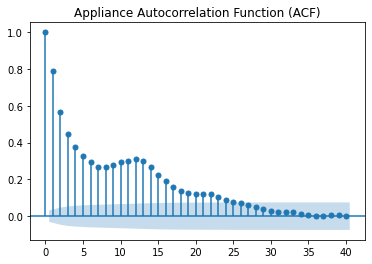

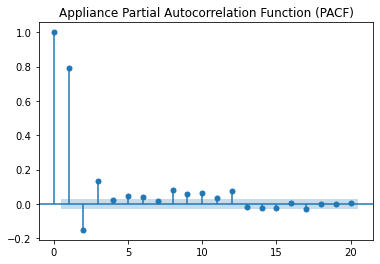

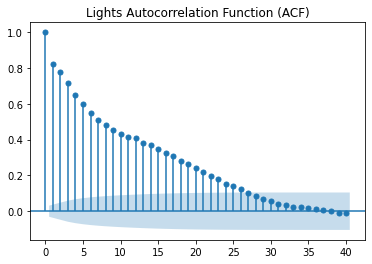

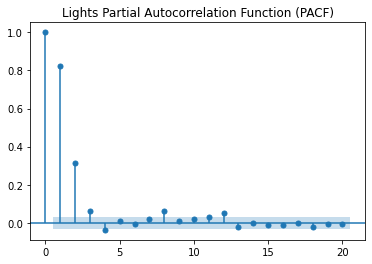

In [62]:
# Plot the ACF and PACF plots
plot_acf(exp_df['Appliances'], lags=40, title ='Appliance Autocorrelation Function (ACF)')
plot_pacf(exp_df['Appliances'], lags=20, title ='Appliance Partial Autocorrelation Function (PACF)')
plot_acf(exp_df['lights'],lags=40, title = 'Lights Autocorrelation Function (ACF)')
plot_pacf(exp_df['lights'],lags=20, title='Lights Partial Autocorrelation Function (PACF)')

plt.show()

**3. Seasonality, Trend, Residuals**

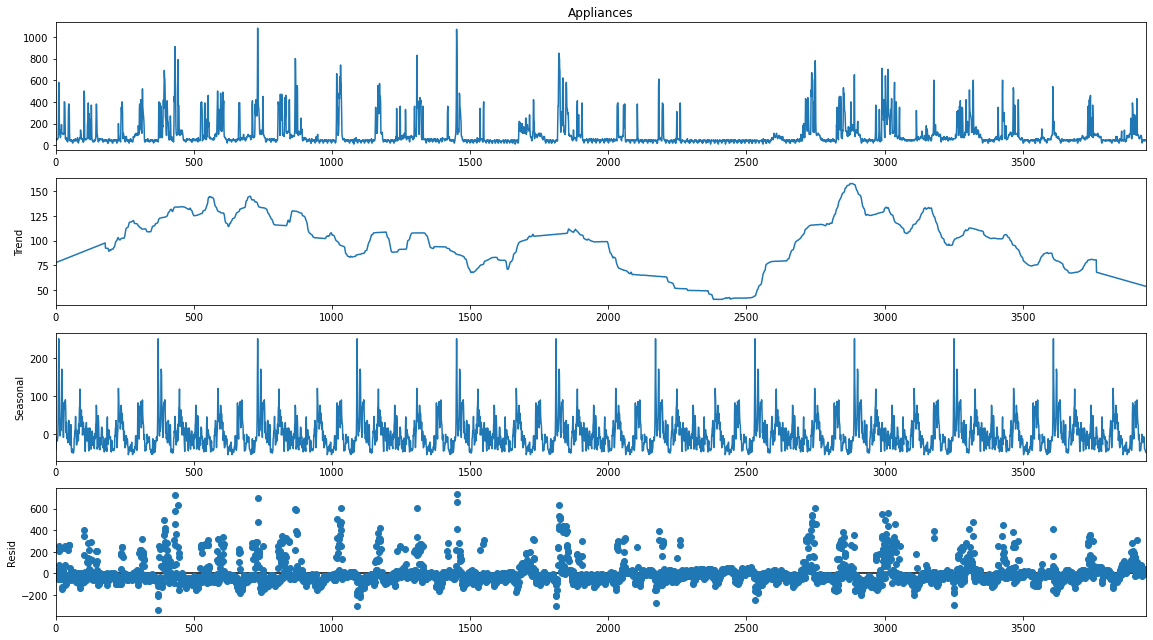

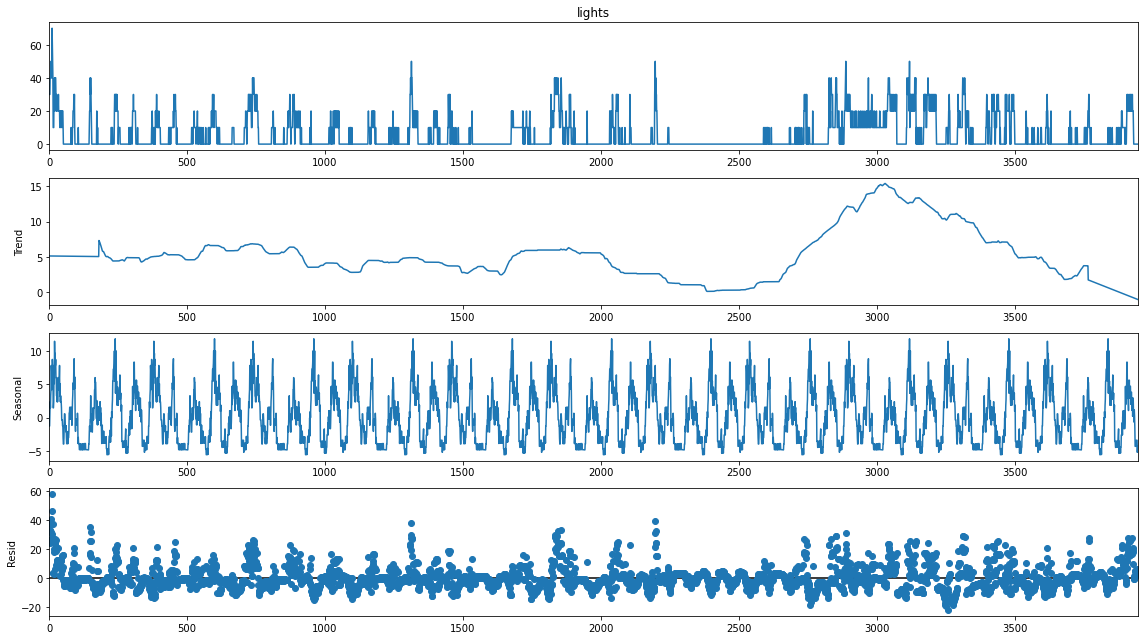

In [70]:
decomp = seasonal_decompose(exp_df['Appliances'],model = 'additive',period = 360,extrapolate_trend = 'freq')
fig = decomp.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

decomp = seasonal_decompose(exp_df['lights'],model = 'additive',period = 360,extrapolate_trend = 'freq')
fig = decomp.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

#### Decomposition of Appliances and Lights

In [ ]:
import statsmodels as sm
import matplotlib as mpl

In [ ]:
mpl.rcParams['figure.figsize'] = 16, 9
decomposed_app = sm.tsa.seasonal.seasonal_decompose(df['Appliances'],freq=360) # The frequncy is annual
figure = decomposed_app.plot()
plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
plt.show()

In [ ]:
# Now, for decomposition...
mpl.rcParams['figure.figsize'] = 16, 9
decomposed_lights = sm.tsa.seasonal.seasonal_decompose(df['lights'],freq=360) # The frequncy is annual
figure = decomposed_lights.plot()
#plt.xticks(rotation=90) # Rotating X tickts by 45 degrees
plt.show()

#### Make Train and Test Data

In [ ]:
# update data types
exp_df['date'] = pd.to_datetime(exp_df['date'])
exp_df['Appliances'] = exp_df['Appliances'].astype('float')
exp_df['lights'] = exp_df['lights'].astype('float')

In [ ]:
train = exp_df[:int(0.8*(len(exp_df)))]
test = exp_df[int(0.8*(len(exp_df))):]
train = np.asarray(train)
test = np.asarray(test)

## Short-list Promising Programs

#### Test Models

In [ ]:
data = exp_df.drop(['date'], axis=1)
data.index = exp_df.date

In [ ]:
# Predicting energy use by Appliances and lights
train_samp_app = pd.concat([df['Appliances'].diff().iloc[1:],df['lights'].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_samp_app, order=(5, 0), trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result_app = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_samp_app.iloc[1:1002].values, predicted_result_app.values))
print("The root mean squared error is {}.".format(rmse))

In [ ]:
# Predicting energy use by Appliances and lights
train_samp = pd.concat([df['lights'].diff().iloc[1:],df['Appliances'].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_samp, order=(5, 0), trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_samp.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

## Fine-Tune the System

In [ ]:
plt.plot(train_samp_app[1:502],color='red')
plt.plot(predicted_result_app,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Appliances Energy')
plt.show()

In [ ]:
plt.plot(train_samp[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Lights Energy')
plt.show()